<a href="https://colab.research.google.com/github/ihdil/SDAIAMLProjects/blob/main/Titanic_dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Titanic Dataset
---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

### Data Description
The Titanic dataset is a well-known dataset that contains information about passengers onboard the RMS Titanic, including their demographics, cabin class, ticket information, and survival status. The dataset is often used for data analysis and prediction tasks. It consists of the following columns:

- PassengerId: Unique identifier for each passenger
- Survived: Survival status (0 = No, 1 = Yes)
- Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
- Name: Passenger's name
- Sex: Passenger's gender
- Age: Passenger's age in years
- SibSp: Number of siblings/spouses aboard the Titanic
- Parch: Number of parents/children aboard the Titanic
- Ticket: Ticket number
- Fare: Fare paid for the ticket
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


The goal of analyzing the Titanic dataset is often to explore patterns and factors that influenced the survival of passengers during the tragic event.

In [ ]:


# Load the Titanic dataset into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')




# 1. Explore the Dataset

## 1.1 Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

Notice how age, cabin, and embarked features have null values

## 1.2 Exploratory data analysis

### Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [ ]:
print(df.isnull().sum())   # Count of missing values in each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Explore descriptive statistics

In [ ]:
print(df.describe())   # Summary statistics for numerical columns


### Data Visualization

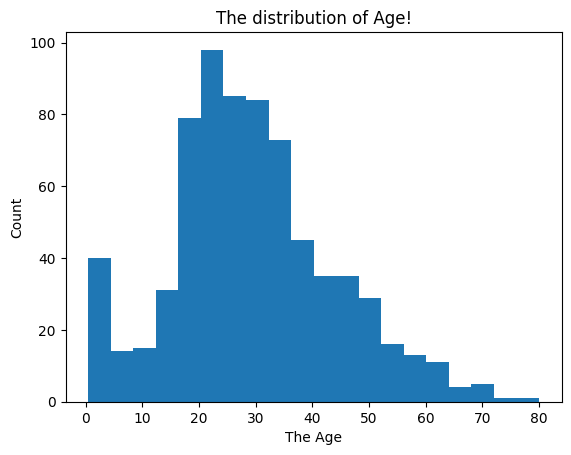

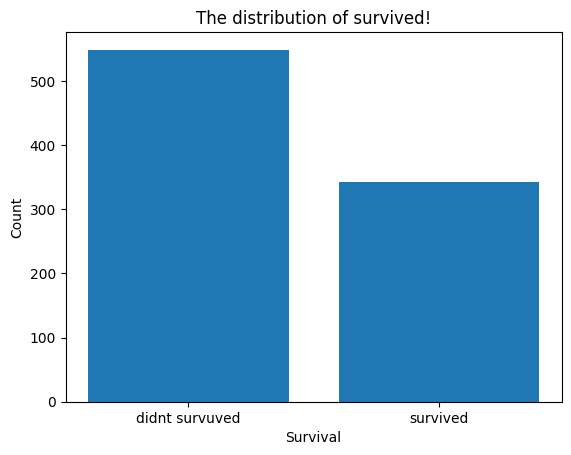

In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram
plt.hist(df['Age'], bins=20)
plt.xlabel('The Age')
plt.ylabel('Count')
plt.title("The distribution of Age!")
plt.show()

# Example: Bar plot
survivecount=df['Survived'].value_counts()
label = ['didnt survuved', 'survived']
plt.bar(label , survivecount)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title("The distribution of survived!")
plt.show()



## 1.3 Cleaning

### Handling Missing Values

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Option 1: Remove rows with missing values
df_copy_dropped = df_copy.dropna()



# Option 2: Impute missing values
# Fill missing values with a specific value

df_copy_filled = df_copy.fillna(0)


# Fill missing values with the mean value of the column

df_copy_mean = df_copy.fillna(df_copy.mean())


# Option 3: Drop columns with excessive missing data
# Set a threshold for the percentage of missing values in a column
threshold = 0.5  # Example threshold of 50%
df_copy_dropped_cols = df_copy.dropna(thresh=threshold*len(df_copy), axis=1)

# Print the modified DataFrames
print("DataFrame with dropped rows:\n", df_copy_dropped)
print("DataFrame with filled missing values:\n", df_copy_filled)
print("DataFrame with filled missing values using mean:\n", df_copy_mean)


### Data Types

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Convert "survived" column to boolean
df_copy['Survived'] = df_copy['Survived'].astype(bool)



# Print the modified DataFrame
print(df_copy['Survived'])


0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool


## 1.4 Feature Correlation

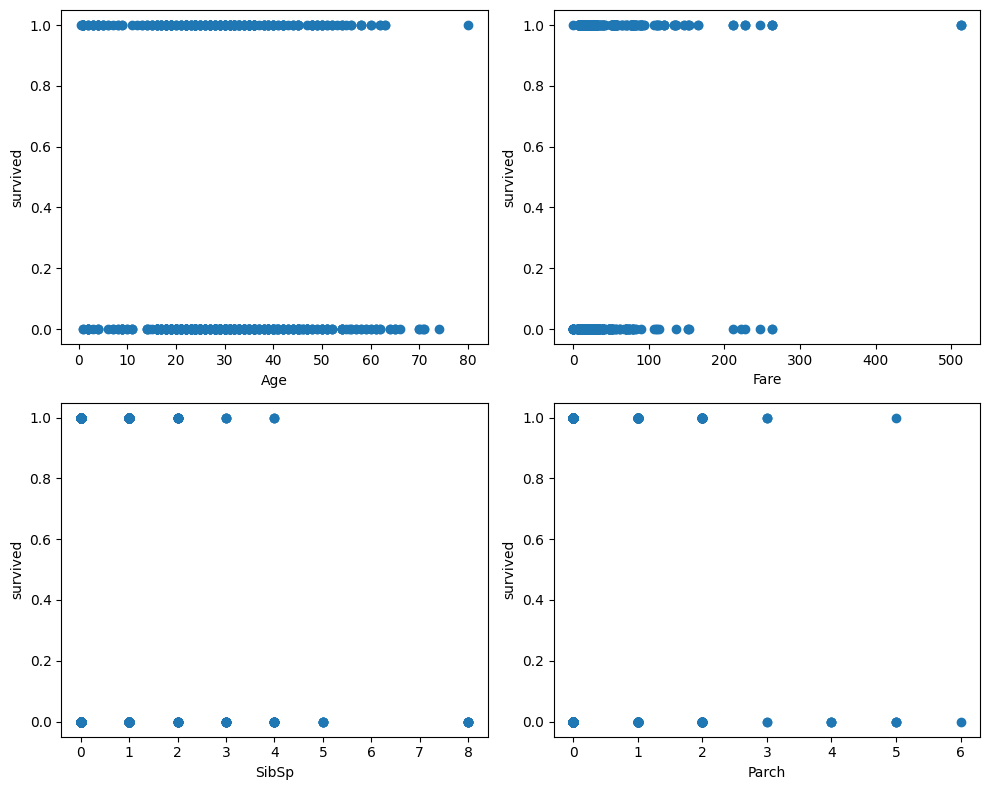

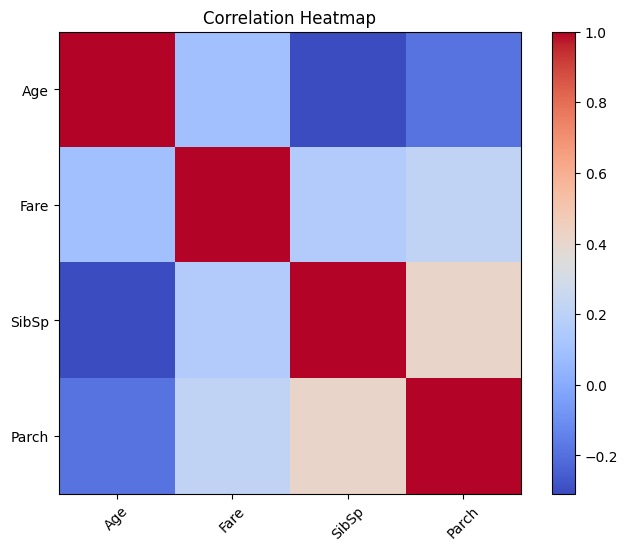

In [ ]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['Age', 'Fare', 'SibSp', 'Parch']

# Scatter plots
plt.figure(figsize=(10,8))
for i, column in enumerate(columns_of_interest):
  plt.subplot(2,2, i+1)
  plt.scatter(df[column], df['Survived'])
  plt.xlabel(column)
  plt.ylabel('survived')
plt.tight_layout()
plt.show()
# Correlation heatmap
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(columns_of_interest))
plt.xticks(tick_marks, columns_of_interest, rotation=45)
plt.yticks(tick_marks, columns_of_interest)
plt.title('Correlation Heatmap')
plt.show()

